In [1]:
import pandas as pd
import numpy as np
import csv
import random
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('NYPD_Complaint_Data_Historic-2.csv')

In [3]:
df.head().T

,0,1,2,3,4
CMPLNT_NUM,724718389,191133903,720151206,232242098,708078702
CMPLNT_FR_DT,09/04/2014,10/12/2016,09/28/2012,03/24/2015,05/20/2017
CMPLNT_FR_TM,17:25:00,07:40:00,13:30:00,15:45:00,04:02:00
CMPLNT_TO_DT,09/04/2014,10/12/2016,09/28/2012,NaN,05/20/2017
CMPLNT_TO_TM,17:35:00,07:45:00,14:00:00,NaN,04:09:00
ADDR_PCT_CD,81,121,41,46,109
RPT_DT,09/04/2014,10/12/2016,10/19/2012,03/24/2015,05/20/2017
KY_CD,344,109,109,341,344
OFNS_DESC,ASSAULT 3 & RELATED OFFENSES,GRAND LARCENY,GRAND LARCENY,PETIT LARCENY,ASSAULT 3 & RELATED OFFENSES
PD_CD,101,417,413,339,101


In [4]:
# select specific columns,which we are going to use
df_new = df[['CMPLNT_FR_DT','Latitude','Longitude','BORO_NM','LAW_CAT_CD','OFNS_DESC','CMPLNT_FR_TM']]

In [5]:
#drop null values
df_new = df_new.dropna()

#select 2019 data only
df_new['YEAR'] = df_new['CMPLNT_FR_DT'].str.split('/').str.get(2)
df_final = df_new[df_new['YEAR']=='2019']

#cleanning time related columns and created new columns
df_final['CMPLNT_FR_DT'] = pd.to_datetime(df_final['CMPLNT_FR_DT'])
df_final['CMPLNT_FR_TM'] = df_final['CMPLNT_FR_TM'].str.split(':').str.get(0)
df_final.set_index('CMPLNT_FR_DT',inplace = True)
df_final['MONTH'] = df_final.index.month
df_final['WEEK'] = df_final.index.dayofweek

#rename
df_final.rename(columns = {'CMPLNT_FR_DT':'Date','CMPLNT_FR_TM':'HR','BORO_NM':'BORO','LAW_CAT_CT':'LAW_CAT',
                           'OFNS_DESC':'CRIME TYPE'},inplace = True)
df_final.drop('YEAR',axis = 1,inplace = True)
df_final.head()

,Latitude,Longitude,BORO,LAW_CAT_CD,CRIME TYPE,HR,MONTH,WEEK
CMPLNT_FR_DT,,,,,,,,
2019-01-01,40.701528,-73.943227,BROOKLYN,FELONY,DANGEROUS WEAPONS,16,1,1
2019-01-02,40.822738,-73.861370,BRONX,FELONY,FELONY ASSAULT,19,1,2
2019-01-02,40.741944,-73.997223,MANHATTAN,FELONY,FELONY ASSAULT,22,1,2
2019-01-02,40.861760,-73.866618,BRONX,FELONY,BURGLARY,19,1,2
2019-01-03,40.746851,-73.985724,MANHATTAN,FELONY,ROBBERY,15,1,3


# Explore data

# Amount of Crime by BORO

In [6]:
#one-hot encoded LAW_CAT_CD so as to calculate number of event readily
df_final['LAW_CAT_CD'] = df_final['LAW_CAT_CD'].astype('category')
df_final = pd.get_dummies(data = df_final,columns = ['LAW_CAT_CD'])
df_final.rename(columns = {'LAW_CAT_CD_FELONY':'FELONY','LAW_CAT_CD_MISDEMEANOR':'MISDEMEANOR',
                          'LAW_CAT_CD_VIOLATION':'VIOLATION'},inplace = True)

In [7]:
#calculate law cat by boro
byboro = df_final.groupby(['BORO'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()
byboro['all'] = byboro['FELONY'] + byboro['MISDEMEANOR'] + byboro['VIOLATION']
#calculate percentage of law cat in each boro
for i in ['FELONY','MISDEMEANOR','VIOLATION']:
    byboro[i] = byboro[i] / byboro['all']
byboro.drop('all',axis = 1,inplace = True)

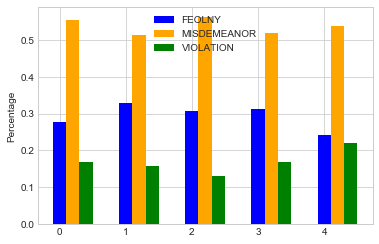

In [8]:
#visualize Crime severity by Boro 
fig, ax = plt.subplots()
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.2
opacity = 1
rects1 = plt.bar(index, byboro.FELONY, bar_width,alpha=opacity,color='b',label='FEOLNY')
rects2 = plt.bar(index + bar_width, byboro.MISDEMEANOR, bar_width,alpha=opacity,color='orange',label='MISDEMEANOR')
rects3 = plt.bar(index + 2*bar_width, byboro.VIOLATION, bar_width,alpha=opacity,color='g',label='VIOLATION')
plt.ylabel('Percentage')
plt.legend()

# Crime severity by hr 

In [9]:
byhr = df_final.groupby(['HR'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()
byhr

,FELONY,MISDEMEANOR,VIOLATION
HR,,,
00,7357.0,10782.0,2150.0
01,4859.0,7426.0,1632.0
02,4375.0,6285.0,1277.0
03,3859.0,5257.0,1013.0
04,3265.0,4769.0,926.0
05,2433.0,3413.0,808.0
06,2737.0,3809.0,1080.0
07,3035.0,5271.0,2035.0
08,4522.0,8126.0,3119.0


Text(0.5, 1.0, 'law cat by HR')

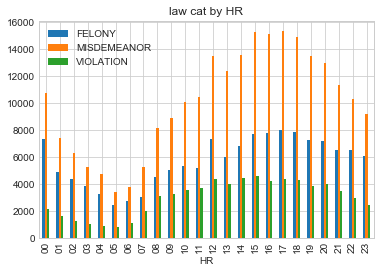

In [10]:
byhr.plot.bar()
plt.title('law cat by HR')

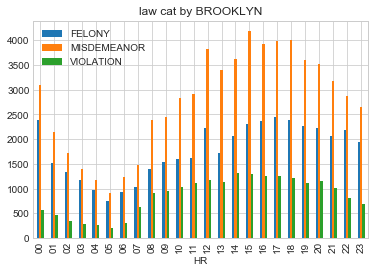

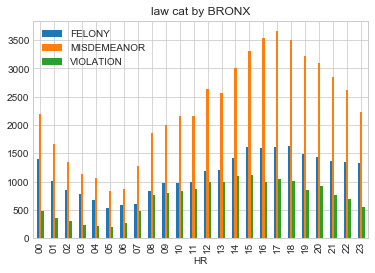

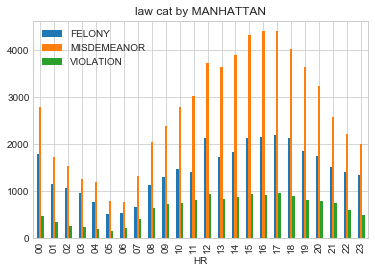

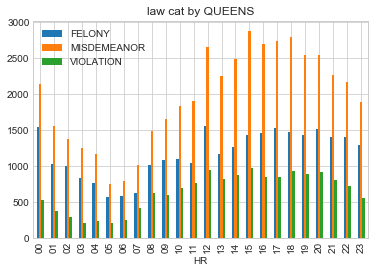

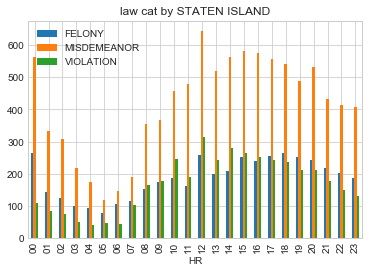

In [11]:
#Crime severity by HR and by BORO at the same time
for i in df_final['BORO'].unique():
    a = df_final[df_final['BORO'] == i].groupby(['HR'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()
    a.plot.bar()
    plt.title('law cat by '+ str(i))

# Law Cat by month 

In [12]:
bymonth = df_final.groupby(['MONTH'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()
bymonth

,FELONY,MISDEMEANOR,VIOLATION
MONTH,,,
1,10805.0,19540.0,5473.0
2,9503.0,17251.0,4990.0
3,10740.0,19715.0,5813.0
4,10743.0,19493.0,5991.0
5,11995.0,21521.0,6490.0
6,12107.0,21152.0,6420.0
7,13025.0,22567.0,6421.0
8,12802.0,21521.0,6290.0
9,12326.0,21268.0,6255.0


Text(0.5, 1.0, 'law cat by MONTH')

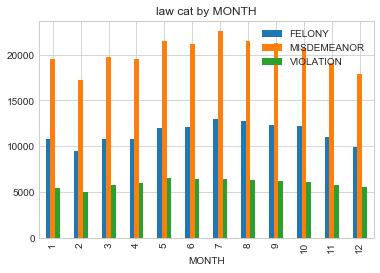

In [13]:
bymonth.plot.bar()
plt.title('law cat by MONTH')

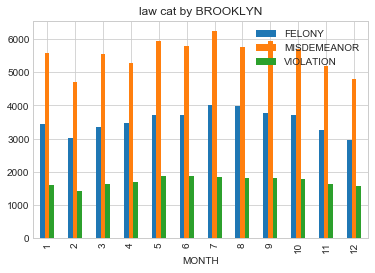

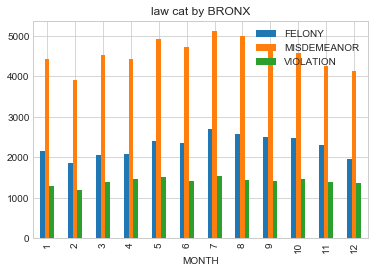

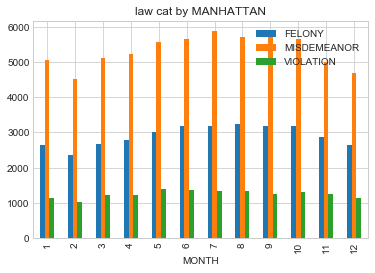

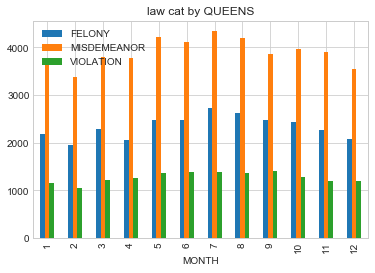

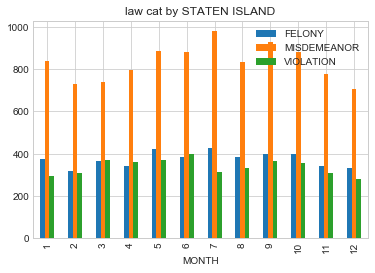

In [14]:
for i in df_final['BORO'].unique():
    a = df_final[df_final['BORO'] == i].groupby(['MONTH'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()
    a.plot.bar()
    plt.title('law cat by '+ str(i))

# Law cat by week

Text(0.5, 1.0, 'law cat by dayofweek')

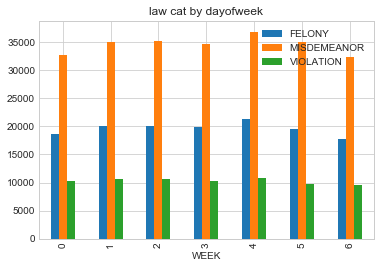

In [15]:
byweek = df_final.groupby(['WEEK'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()
byweek.plot.bar()
plt.title('law cat by dayofweek')

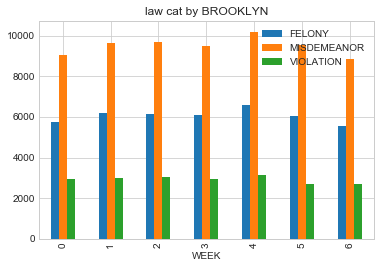

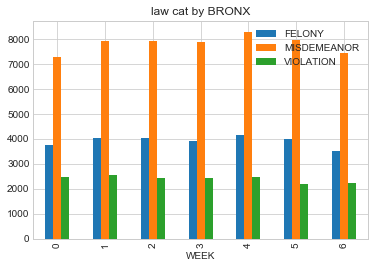

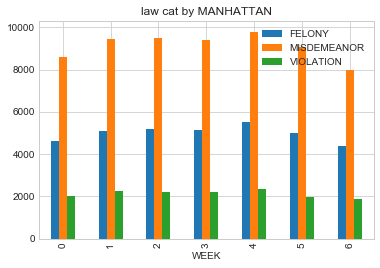

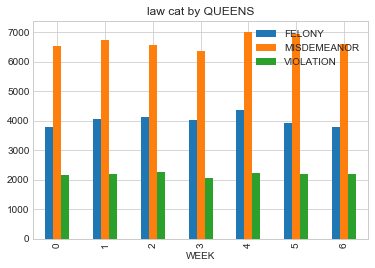

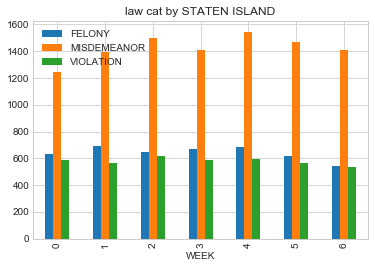

In [16]:
for i in df_final['BORO'].unique():
    a = df_final[df_final['BORO'] == i].groupby(['WEEK'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()
    a.plot.bar()
    plt.title('law cat by '+ str(i))

# Sampled 20000 crimes based on the ratio of crime in each boro.

In [18]:
#only keep 2019 data
df_new['CMPLNT_FR_DT'] = df_new['CMPLNT_FR_DT'].str.split('/').str.get(2)
df_final = df_new[df_new['CMPLNT_FR_DT'] == '2019']

In [19]:
#calculate ratio
for i in df_final['BORO_NM'].unique():
    a = (df_final['BORO_NM'] == i)
    print(i,a.sum())

BROOKLYN 129370
BRONX 99000
MANHATTAN 113644
QUEENS 90145
STATEN ISLAND 18510


In [20]:
#sampled based on previous result
df_final[df_final['BORO_NM'] =='BROOKLYN'] = df_final[df_final['BORO_NM'] =='BROOKLYN'].sample(5741)
df_final[df_final['BORO_NM'] =='BRONX'] = df_final[df_final['BORO_NM'] =='BRONX'].sample(4393)
df_final[df_final['BORO_NM'] =='MANHATTAN'] = df_final[df_final['BORO_NM'] =='MANHATTAN'].sample(5043)
df_final[df_final['BORO_NM'] =='QUEENS'] = df_final[df_final['BORO_NM'] =='QUEENS'].sample(4000)
df_final[df_final['BORO_NM'] =='STATEN ISLAND'] = df_final[df_final['BORO_NM'] =='STATEN ISLAND'].sample(821)

In [21]:
#drop null values
df_final = df_final.dropna()

In [22]:
df_final

,CMPLNT_FR_DT,Latitude,Longitude,BORO_NM,LAW_CAT_CD,OFNS_DESC,CMPLNT_FR_TM,YEAR
4076870,2019,40.701528,-73.943227,BROOKLYN,FELONY,DANGEROUS WEAPONS,16:25:00,2019
4076893,2019,40.677074,-73.983194,BROOKLYN,VIOLATION,HARRASSMENT 2,07:30:00,2019
4076926,2019,40.674325,-73.888389,BROOKLYN,FELONY,DANGEROUS WEAPONS,17:30:00,2019
4077095,2019,40.799583,-73.962622,MANHATTAN,FELONY,GRAND LARCENY,15:30:00,2019
4077098,2019,40.822452,-73.885900,BRONX,MISDEMEANOR,VEHICLE AND TRAFFIC LAWS,18:49:00,2019
...,...,...,...,...,...,...,...,...
4541828,2019,40.684916,-73.988921,BROOKLYN,MISDEMEANOR,PETIT LARCENY,15:31:00,2019
4541829,2019,40.696995,-73.935225,BROOKLYN,MISDEMEANOR,THEFT OF SERVICES,13:30:00,2019
4541876,2019,40.728254,-73.999316,MANHATTAN,MISDEMEANOR,PETIT LARCENY,19:00:00,2019
4541878,2019,40.705481,-73.950239,BROOKLYN,VIOLATION,HARRASSMENT 2,07:40:00,2019


In [ ]:
#export as csv
Result ='/Users/tylin/Downloads/crime-20000.csv'

df_final.to_csv( Result, index=False )